# Kronnig-Penney Calculation and Graphical Analysis

This notebook provides a numerical solution to the Kronig-Penney equation, and plots the band structure E(k).

For reference, I am using the Kronig-Penney equation in the following form:

$P\frac{sin(\alpha a)}{\alpha a} + cos(\alpha a) = cos(ka)$ (1)

where $P = \frac{mV_0 a}{\hbar ^2}$, $\alpha = \frac{\sqrt{2mE}}{\hbar}$, $a$ is the distance between $\delta$ functions, $m$ is the electron mass, $k$ is the Bloch wave vector, and $\hbar$ is the reduced Planck constant.
The parameter $V_0$ denotes the "strength" of the barrier, calculated at the product of the width $b$ and height $h$ of the barriers in the finite barrier Kronig-Penney model; $V_0 = bh$

## a) Dimension Analysis of $V_0$
First I perform a dimension analysis of Eq. 1 to find the dimensions of $V_0$.

After rearranging Eq. 1, we find that $V_0$ has dimensions equivalent to those of $\frac{\alpha \hbar ^2}{m}$.

This reduces to $Jm$, which implies that $V_0$ has dimensions equivalent to *energy x length*.

## b) Calculate P
Now I calculate P using the following parameters:

$\hbar = 1.05\times10^-34 Js$, $m = 9.11\times10^-31 kg$, $a = 5\times10^-10 m$, $b = 1\times10^-10 m$, $e = 1.6\times10^-19 C$, $h = 5eV = e\times5J$

Note that P is dimensionless.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Using parameters to calculate P

m = 9.11*10**-31
e = 1.6*10**-19
h = 5
V_0 = 1*10**-10 * e * h      # V_0 = b * h
a = 5*10**-10
hbar = 1.05*10**-34

P = (m*V_0*a)/(hbar**2)

print(f'P = {P}')

P = 3.3052154195011343


In [8]:
# c) create columns of energy values in eV and J

# energy values in eV
E_eV = np.arange(0,30.01,0.01)

# energy values in J
E_J = E_eV*e

In [9]:
# d) calculate values for alpha*a

alpha = np.sqrt(2*m*E_J)/hbar

alpha_a = alpha*a

/Users/benivitai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'LHS')

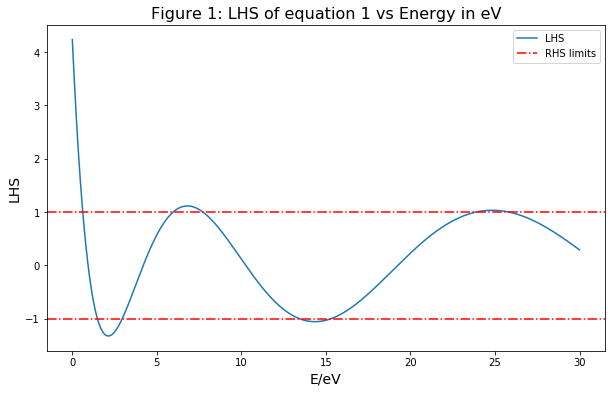

In [33]:
# e) compute values for LHS of equation 1

LHS = P*(np.sin(alpha_a)/alpha_a) + np.cos(alpha_a)

# plot LHS vs E_eV

plt.figure(figsize=[10,6])
plt.title('Figure 1: LHS of equation 1 vs Energy in eV',fontsize=16)
plt.plot(E_eV,LHS,label='LHS')
plt.axhline(y=1, color='r', linestyle='-.',label='RHS limits')
plt.axhline(y=-1, color='r', linestyle='-.')
plt.legend()
plt.xlabel('E/eV',fontsize=14)
plt.ylabel('LHS',fontsize=14)

Note that equation 1 does not have solutions where the value of the curve exceeds the RHS limits of $\pm 1$. These regions correspond to the band gaps of the solid used in this example.

/Users/benivitai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'E/eV')

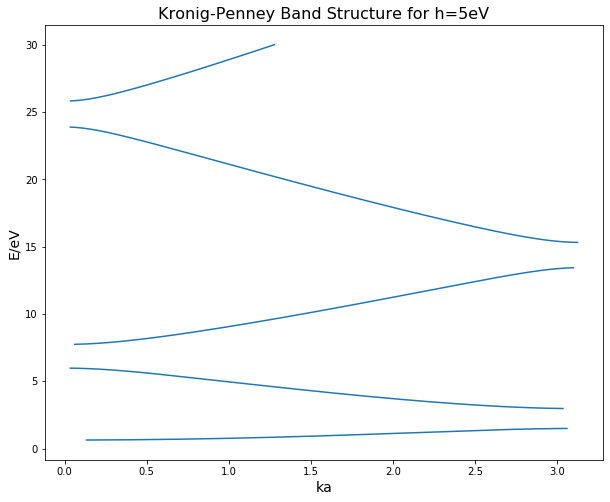

In [36]:
# f) solve eq 1 for ka

ka = np.arccos(LHS)

# plot E_eV vs ka to obtain Kronig-Penney band structure

plt.figure(figsize=[10,8])
plt.title('Kronig-Penney Band Structure for h=5eV',fontsize=16)
plt.plot(ka,E_eV)
plt.xlabel('ka',fontsize=14)
plt.ylabel('E/eV',fontsize=14)

/Users/benivitai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/benivitai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/Users/benivitai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app


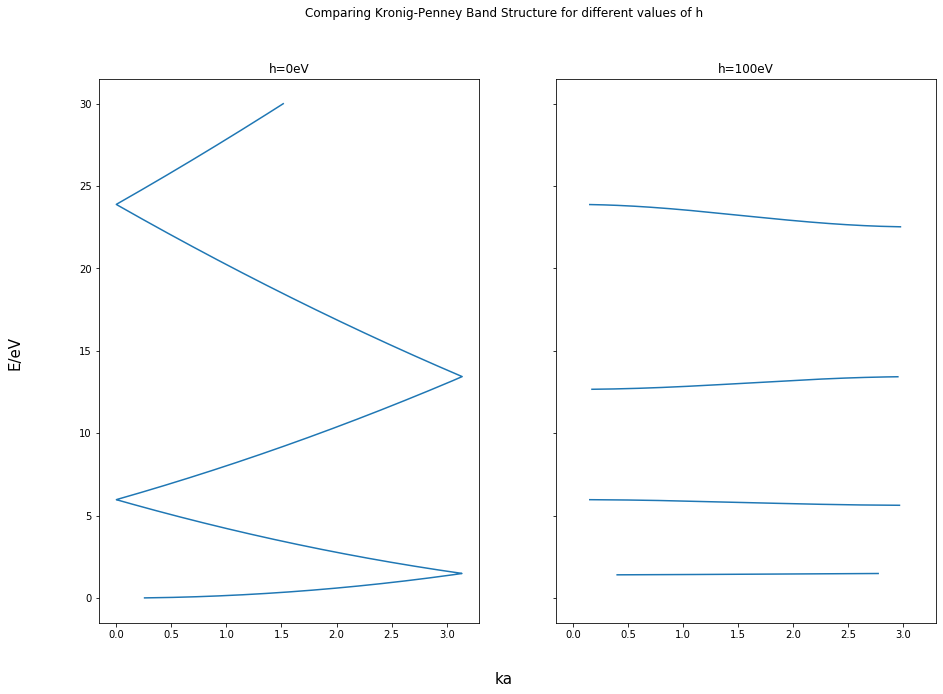

In [62]:
# g) Compare to plot for h=0eV and h=100eV

# calculate parameters for h=0eV
h_0 = 0
V_0_0 = 1*10**-10 * e * h_0      # V_0 = b * h
P_0 = (m*V_0_0*a)/(hbar**2)
LHS_0 = P_0*(np.sin(alpha_a)/alpha_a) + np.cos(alpha_a)
ka_0 = np.arccos(LHS_0)

# calculate parameters for h=100eV
h_100 = 100
V_0_100 = 1*10**-10 * e * h_100      # V_0 = b * h
P_100 = (m*V_0_100*a)/(hbar**2)
LHS_100 = P_100*(np.sin(alpha_a)/alpha_a) + np.cos(alpha_a)
ka_100 = np.arccos(LHS_100)

# set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True,sharey=True, figsize=[15,10])
fig.suptitle('Comparing Kronig-Penney Band Structure for different values of h')
fig.text(0.5, 0.04, 'ka', ha='center',size=15)
fig.text(0.04, 0.5, 'E/eV', va='center', rotation='vertical',size=15)

# plot h=0eV case
ax1.set_title('h=0eV')
ax1.plot(ka_0,E_eV)

# plot h=100eV case
ax2.set_title('h=100eV')
ax2.plot(ka_100,E_eV)

It appears that in the case where h = 0eV, there are no band gaps.

By contrast, in the case where h = 100eV, the band gaps are much larger than even those in the h = 5eV case. It appears that as h tends to infinity, the plot will show us the electron energy levels of the atom.